<a href="https://colab.research.google.com/github/skbhere/OSIC-Pulmonary-Fibrosis-Progression/blob/master/Osic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**OSIC Pulmonary Fibrosis Progression**

In [7]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf


In [8]:
df = pd.read_csv("train.csv")

In [9]:
df.tail()

,Patient,Weeks,FVC,Percent,Age,Sex,SmokingStatus
1544,ID00426637202313170790466,13,2712,66.594637,73,Male,Never smoked
1545,ID00426637202313170790466,19,2978,73.126412,73,Male,Never smoked
1546,ID00426637202313170790466,31,2908,71.407524,73,Male,Never smoked
1547,ID00426637202313170790466,43,2975,73.052745,73,Male,Never smoked
1548,ID00426637202313170790466,59,2774,68.117081,73,Male,Never smoked


In [10]:
df['Patient_number'] = pd.Categorical((pd.factorize(df.Patient)[0] + 1).astype(np.float32))

In [11]:
sex_dummy = pd.get_dummies(df.Sex)
smoke_dummy = pd.get_dummies(df.SmokingStatus)
df["Male"],df["Female"]=sex_dummy["Male"],sex_dummy["Female"]
df["Ex-smoker"],df["Never smoked"]=smoke_dummy["Ex-smoker"],smoke_dummy["Never smoked"]
df_patient =df
df=df.drop(['Sex', 'SmokingStatus',"Patient"], axis=1)

In [12]:
df_patient=df_patient.drop(['Sex', 'SmokingStatus',"Percent","Weeks","FVC","Age","Male","Female","Ex-smoker","Never smoked"], axis=1)

In [13]:
df.head()

,Weeks,FVC,Percent,Age,Patient_number,Male,Female,Ex-smoker,Never smoked
0,-4,2315,58.253649,79,1.0,1,0,1,0
1,5,2214,55.712129,79,1.0,1,0,1,0
2,7,2061,51.862104,79,1.0,1,0,1,0
3,9,2144,53.950679,79,1.0,1,0,1,0
4,11,2069,52.063412,79,1.0,1,0,1,0


In [14]:
x=df[['Weeks','Percent','Patient_number','Male','Female',"Ex-smoker","Never smoked","Age"]].values
y=df[['FVC']].values
# scalar = MinMaxScaler()
# scalar.fit(x)
# x = scalar.transform(x)

In [15]:
 X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=42)

In [16]:
X_train.shape[1]

8

In [17]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_percentage_error']) 
NN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1152      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 166,017
Trainable params: 166,017
Non-trainable params: 0
_________________________________________________________________


In [18]:
x = np.asarray(x).astype(np.float32)
x.shape
y=np.asarray(y).astype(np.float32)
y

array([[2315.],
       [2214.],
       [2061.],
       ...,
       [2908.],
       [2975.],
       [2774.]], dtype=float32)

In [19]:
history =NN_model.fit(x,y, epochs=100, batch_size=32, validation_split = 0.2,verbose=2)


Epoch 1/100
39/39 - 0s - loss: 1878.2881 - mean_absolute_percentage_error: 70.6783 - val_loss: 570.9355 - val_mean_absolute_percentage_error: 26.5095
Epoch 2/100
39/39 - 0s - loss: 683.9604 - mean_absolute_percentage_error: 28.4458 - val_loss: 645.9377 - val_mean_absolute_percentage_error: 30.6523
Epoch 3/100
39/39 - 0s - loss: 517.2705 - mean_absolute_percentage_error: 23.1917 - val_loss: 398.8749 - val_mean_absolute_percentage_error: 16.6712
Epoch 4/100
39/39 - 0s - loss: 468.0415 - mean_absolute_percentage_error: 21.1771 - val_loss: 377.5136 - val_mean_absolute_percentage_error: 15.7922
Epoch 5/100
39/39 - 0s - loss: 440.0987 - mean_absolute_percentage_error: 20.1039 - val_loss: 405.0510 - val_mean_absolute_percentage_error: 17.7887
Epoch 6/100
39/39 - 0s - loss: 425.3117 - mean_absolute_percentage_error: 19.2895 - val_loss: 389.9607 - val_mean_absolute_percentage_error: 16.5624
Epoch 7/100
39/39 - 0s - loss: 414.6972 - mean_absolute_percentage_error: 18.5155 - val_loss: 391.3250 - 

<Figure size 432x288 with 0 Axes>

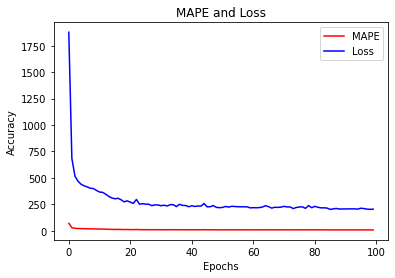

<Figure size 432x288 with 0 Axes>

In [20]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
mape=history.history['mean_absolute_percentage_error']
loss=history.history['loss']

epochs=range(len(loss)) # Get number of epochs

#------------------------------------------------
# Plot MAE and Loss
#------------------------------------------------
plt.plot(epochs, mape, 'r')
plt.plot(epochs, loss, 'b')
plt.title('MAPE and Loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["MAPE", "Loss"])

plt.figure()

In [44]:
from statistics import mean
confidence= 100-mean(mape)
confidence


88.9549548959732

In [22]:
dft = pd.read_csv("test.csv")

In [23]:
dft

,Patient,Weeks,FVC,Percent,Age,Sex,SmokingStatus
0,ID00419637202311204720264,6,3020,70.186855,73,Male,Ex-smoker
1,ID00421637202311550012437,15,2739,82.045291,68,Male,Ex-smoker
2,ID00422637202311677017371,6,1930,76.672493,73,Male,Ex-smoker
3,ID00423637202312137826377,17,3294,79.258903,72,Male,Ex-smoker
4,ID00426637202313170790466,0,2925,71.824968,73,Male,Never smoked


In [24]:
sex_dummy = pd.get_dummies(dft.Sex)
smoke_dummy = pd.get_dummies(dft.SmokingStatus)


In [25]:
dft["Male"]=sex_dummy["Male"]
dft["Ex-smoker"],dft["Never smoked"]=smoke_dummy["Ex-smoker"],smoke_dummy["Never smoked"]
dft=dft.drop(['Sex', 'SmokingStatus'], axis=1)

In [26]:
pid = list (dft["Patient"])

In [27]:

def getpid (x):

  dfx = df_patient.loc[df_patient['Patient'] == x]
  dfx=dfx.reset_index()
  return dfx["Patient_number"][0]
# dfx.get_value(1, 'Patient')
dft

,Patient,Weeks,FVC,Percent,Age,Male,Ex-smoker,Never smoked
0,ID00419637202311204720264,6,3020,70.186855,73,1,1,0
1,ID00421637202311550012437,15,2739,82.045291,68,1,1,0
2,ID00422637202311677017371,6,1930,76.672493,73,1,1,0
3,ID00423637202312137826377,17,3294,79.258903,72,1,1,0
4,ID00426637202313170790466,0,2925,71.824968,73,1,0,1


In [28]:
def getage (x):
  dfx = dft.loc[dft['Patient'] == x]
  dfx=dfx.reset_index()
  return dfx["Age"][0]

In [29]:
def getpercent (x):
  dfx = dft.loc[dft['Patient'] == x]
  dfx=dfx.reset_index()
  return dfx["Percent"][0]
def getEx_smoker(x):
  dfx = dft.loc[dft['Patient'] == x]
  dfx=dfx.reset_index()
  return dfx["Ex-smoker"][0]
def getNever_smoked(x):
  dfx = dft.loc[dft['Patient'] == x]
  dfx=dfx.reset_index()
  return dfx["Never smoked"][0]

In [30]:
weeks =list(range(-12 ,134))

In [31]:
n = (len(pid)*len(weeks))

In [32]:
patient_week = []
p_id= []
nweeks= []
nage= []
nPercent= []
nmale= []
nfemale= []
Ex_smoker= []
Never_smoked= []
#for i in range (0,n+1):
for x in pid:
  for w in weeks:
      patient_week.append (x + "_" + str(w))
      p_id.append (getpid (x))
      nweeks.append (w)
      nage.append(getage(x))
      nPercent.append(getpercent(x))
      nmale.append(1)
      nfemale.append(0) 
      Ex_smoker.append(getEx_smoker(x))
      Never_smoked.append(getNever_smoked(x))

In [33]:
dic = {'Weeks':nweeks,'Percent': nPercent,'Patient_number':p_id,'Male':nmale,'Female':nfemale,"Ex-smoker":Ex_smoker,"Never smoked":Never_smoked,"Age":nage, }

In [34]:
ninput=pd.DataFrame.from_dict(dic)
xxx = ninput[['Weeks','Percent','Patient_number','Male','Female',"Ex-smoker","Never smoked","Age"]].values
xxx

array([[-12.        ,  70.18685507, 172.        , ...,   1.        ,
          0.        ,  73.        ],
       [-11.        ,  70.18685507, 172.        , ...,   1.        ,
          0.        ,  73.        ],
       [-10.        ,  70.18685507, 172.        , ...,   1.        ,
          0.        ,  73.        ],
       ...,
       [131.        ,  71.82496808, 176.        , ...,   0.        ,
          1.        ,  73.        ],
       [132.        ,  71.82496808, 176.        , ...,   0.        ,
          1.        ,  73.        ],
       [133.        ,  71.82496808, 176.        , ...,   0.        ,
          1.        ,  73.        ]])

In [35]:
xxx=np.asarray(xxx).astype(np.float32)

In [36]:
yyy=NN_model.predict(xxx)
yyy=np.round_(yyy)
yyy=yyy.flatten()

In [45]:
from statistics import mean
confidence= 100-mean(mape)
confidence

88.9549548959732

In [46]:
confidence = np.round_(confidence)
confidence = [confidence]*len(yyy)
confidence

[89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,
 89.0,

In [47]:
data = {"Patient_Week":patient_week,"FVC":yyy,"Confidence":confidence ,}

In [49]:
submision =pd.DataFrame.from_dict(data)
submision.to_csv("Submission")